In [3]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import os

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap

import random

In [13]:
d_t = 1/400
t_max = 3
m, sigma = 0, 1 # standard Brownian motion

ts = np.linspace(0, t_max, int(t_max/d_t))
dxs = np.random.normal(m, sigma * d_t, int(t_max/d_t))
xs = [sum(dxs[:i+1]) for i in range(len(dxs))]
assert len(ts) == len(xs)

In [15]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue 0
    (255, 127, 14),  # Orange 1
    (44, 160, 44),   # Green 2
    (214, 39, 40),   # Red 3
    (148, 103, 189), # Purple 4 
    (140, 86, 75),   # Brown 5
    (227, 119, 194), # Pink 6
    (127, 127, 127), # Gray 7
    (188, 189, 34),  # Yellow 8
    (23, 190, 207),  # Cyan 9
]
# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

## One Trial

In [59]:
d_t = 1/400
t_max = 3
m, sigma = 0, 1 # standard Brownian motion

ts = np.linspace(0, t_max, int(t_max/d_t))
dxs = np.random.normal(m, math.sqrt(sigma * d_t), int(t_max/d_t))
xs = [sum(dxs[:i+1]) for i in range(len(dxs))]
assert len(ts) == len(xs)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/4044090987.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/4044090987.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


Text(0.5, 0.93, 'Brownian Motion')

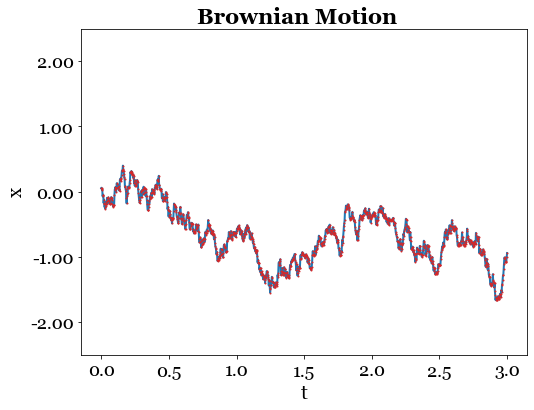

In [60]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()

ax.plot(ts, xs, marker='o', markersize=1,
         markerfacecolor=tableau_colors[3], markeredgecolor=tableau_colors[3], 
        linestyle='-', color = tableau_colors[0], linewidth=2)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax.set_ylim(-2.5, 2.5)

plt.xlabel('t', fontdict=font)
plt.ylabel('x', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Brownian Motion', fontproperties=suptitle_font, y=0.93)


# Simulate 1000 trials

In [71]:
d_t = 1/400
t_max = 3
m, sigma = 0, 1 # standard Brownian motion
num_trial = 1000

max_xs = []
x15s = []
x30s = []
pov_flags = []

for _ in range(num_trial):
#     ts = np.linspace(0, t_max, int(t_max/d_t))
    dxs = np.random.normal(m, math.sqrt(sigma * d_t), int(t_max/d_t))
    xs = [sum(dxs[:i+1]) for i in range(len(dxs))]
    max_xs.append(max(xs))
    x15, x30 = xs[int(t_max/d_t) // 2], xs[-1]
    x15s.append(x15)
    x30s.append(x30)
    pov_flags.append(x15 > 0 and x30 > 0)
    
print(max_xs)
print(x15s)
print(x30s)
print(pov_flags)

[2.53350940116121, 3.5258675634277235, 1.8137908156580054, 0.5571128076516435, 3.89406942676929, 1.555277896489447, 0.597528635632732, 1.7563165305474244, 0.29176062799776, 1.0529944630551795, 3.406063333930385, 3.727351461850274, 0.03252852539374569, 4.053517468584974, 1.242770965776841, 2.1921142474389512, 0.3182704318875862, 1.9001393643047748, 0.28624149033317725, 2.7765629153161564, 1.4763548881567399, 0.2141669391418454, 0.15889602580835538, 1.031690719678844, 0.38592772523002555, 1.6213055265291483, 1.4088251186827427, 0.8979502492641347, 1.297524605336823, 1.1883425034252852, 1.0736086203592874, 1.0656815995944948, -0.021493286297423864, 2.971998449267661, 2.9077906264653457, 0.40444452361161254, 0.39707555235579617, 0.40266773797790245, 4.195132040358228, 0.3589906217207239, 1.1651708869369346, 0.3979949931345324, 0.44563588209968136, 1.7192762390807281, 0.4605234086786801, 2.1271805878115093, 1.1985852323745063, 0.6625385246919672, 0.8409992606333503, 1.5094266944879924, 1.31

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/3487337689.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/3487337689.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/3487337689.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/3487337689.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_9238/3487337689.py:58: UserWarning: FixedFormatter sh

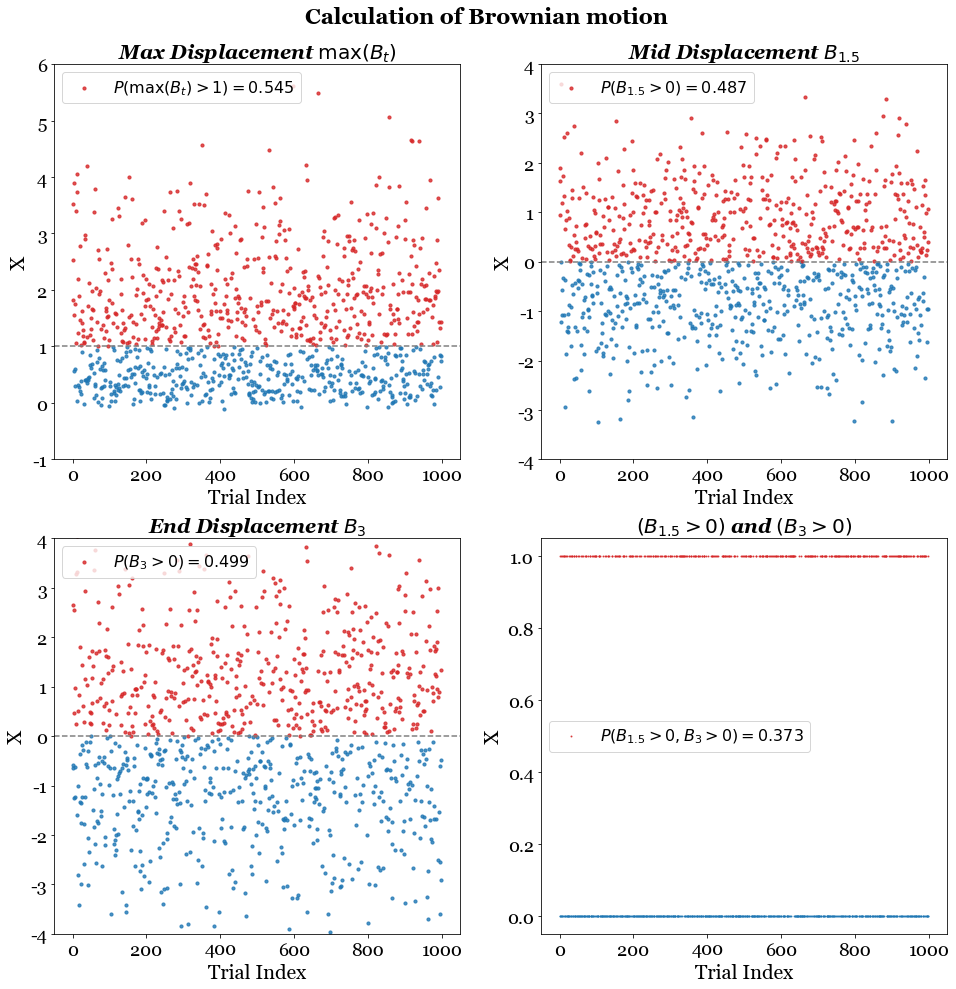

In [103]:
# plotting
inds = [i for i in range(num_trial)]
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

max_xs_lower = [x for i, x in enumerate(max_xs) if x <= 1]
max_xs_upper = [x for i, x in enumerate(max_xs) if x > 1]
inds_lower = [i for i, x in enumerate(max_xs) if x <= 1]
inds_upper = [i for i, x in enumerate(max_xs) if x > 1]
P_max = len(inds_upper) / len(max_xs)
axs[0, 0].scatter(inds_lower, max_xs_lower, marker='o', color=tableau_colors[0], s=10, \
            alpha=0.8)
axs[0, 0].scatter(inds_upper, max_xs_upper, marker='o', color=tableau_colors[3], s=10, \
            alpha=0.8, label=f'$P(\max (B_t) > 1) ={P_max}$')
axs[0, 0].set_ylim(-1, 6)  # Set the y-axis limits
axs[0, 0].set_title('Max Displacement $\max (B_t)$', fontdict=title_font)
axs[0, 0].set_xlabel('Trial Index', fontdict=font)
axs[0, 0].set_ylabel('X', fontdict=font)
axs[0, 0].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
axs[0, 0].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
axs[0, 0].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[0, 0].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[0, 0].axhline(y=1, color=tableau_colors[7], linestyle='--')
axs[0, 0].legend(loc='upper left', prop=legend_font)

mid_xs_lower = [x for i, x in enumerate(x15s) if x <= 0]
mid_xs_upper = [x for i, x in enumerate(x15s) if x > 0]
mid_inds_lower = [i for i, x in enumerate(x15s) if x <= 0]
mid_inds_upper = [i for i, x in enumerate(x15s) if x > 0]
P_mid = len(mid_inds_upper) / len(max_xs)
axs[0, 1].scatter(mid_inds_lower, mid_xs_lower, marker='o', color=tableau_colors[0], s=10, \
            alpha=0.8)
axs[0, 1].scatter(mid_inds_upper, mid_xs_upper, marker='o', color=tableau_colors[3], s=10, \
            alpha=0.8, label=f'$P(B_{{1.5}} > 0) = {P_mid:.3f}$')
axs[0, 1].set_ylim(-4, 4)  # Set the y-axis limits
axs[0, 1].set_title('Mid Displacement $B_{1.5}$', fontdict=title_font)
axs[0, 1].set_xlabel('Trial Index', fontdict=font)
axs[0, 1].set_ylabel('X', fontdict=font)
axs[0, 1].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
axs[0, 1].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
axs[0, 1].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[0, 1].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[0, 1].axhline(y=0, color=tableau_colors[7], linestyle='--')
axs[0, 1].legend(loc='upper left', prop=legend_font)

end_xs_lower = [x for i, x in enumerate(x30s) if x <= 0]
end_xs_upper = [x for i, x in enumerate(x30s) if x > 0]
end_inds_lower = [i for i, x in enumerate(x30s) if x <= 0]
end_inds_upper = [i for i, x in enumerate(x30s) if x > 0]
P_end = len(end_inds_upper) / len(max_xs)
axs[1, 0].scatter(end_inds_lower, end_xs_lower, marker='o', color=tableau_colors[0], s=10, \
            alpha=0.8)
axs[1, 0].scatter(end_inds_upper, end_xs_upper, marker='o', color=tableau_colors[3], s=10, \
            alpha=0.8, label=f'$P(B_{{3}} > 0) = {P_end:.3f}$')
axs[1, 0].set_ylim(-4, 4)  # Set the y-axis limits
axs[1, 0].set_title('End Displacement $B_{3}$', fontdict=title_font)
axs[1, 0].set_xlabel('Trial Index', fontdict=font)
axs[1, 0].set_ylabel('X', fontdict=font)
axs[1, 0].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
axs[1, 0].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
axs[1, 0].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[1, 0].yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[1, 0].axhline(y=0, color=tableau_colors[7], linestyle='--')
axs[1, 0].legend(loc='upper left', prop=legend_font)

flag_xs_lower = [x for i, x in enumerate(pov_flags) if not x]
flag_xs_upper = [x for i, x in enumerate(pov_flags) if x]
flag_inds_lower = [i for i, x in enumerate(pov_flags) if not x]
flag_inds_upper = [i for i, x in enumerate(pov_flags) if x]
P_flag = len(flag_inds_upper) / len(pov_flags)
axs[1, 1].scatter(flag_inds_lower, flag_xs_lower, marker='o', color=tableau_colors[0], s=1, \
            alpha=0.8)
axs[1, 1].scatter(flag_inds_upper, flag_xs_upper, marker='o', color=tableau_colors[3], s=1, \
            alpha=0.8, label=f'$P(B_{{1.5}} > 0, B_{{3}} > 0) = {P_flag:.3f}$')
# axs[0, 1].scatter(df_flagged_randm['bin#'], df_flagged_randm['hits'], marker='o', \
#             color=tableau_colors[3], s=25, alpha=1, label='anomalous count: ' + str(len(df_flagged_randm)))
# axs[1, 1].set_ylim(0, 2.5)  # Set the y-axis limits
axs[1, 1].set_title('$(B_{1.5} > 0)$ and $(B_3 > 0)$', fontdict=title_font)
axs[1, 1].set_xlabel('Trial Index', fontdict=font)
axs[1, 1].set_ylabel('X', fontdict=font)
axs[1, 1].set_xticklabels(ax.get_xticks(), fontdict=tick_font)
axs[1, 1].set_yticklabels(ax.get_yticks(), fontdict=tick_font)
axs[1, 1].xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
axs[1, 1].yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
axs[1, 1].legend(loc='center left', prop=legend_font)

fig.suptitle('Calculation of Brownian motion', fontproperties=suptitle_font, y=0.93)

plt.gcf().set_facecolor('white')
# plt.tight_layout()
plt.savefig('./Brownian_calculation.png') 
plt.show()
